In [79]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
import numpy.linalg as linalg
import numpy as np
import seaborn as sns
import pandas as pd
import scipy

In [63]:
def show_matrix(data):
    min_val, max_val = 0, 15
    cm = sns.light_palette("blue", as_cmap=True)
    x=pd.DataFrame(data)
    x=x.style.background_gradient(cmap=cm)
    display(x)

In [115]:
def calculate_egein(norm_Lapl):
    val, vec = np.linalg.eigh(norm_Lapl)
    idx = np.argsort(val)
    val = val[idx]
    vec = vec[:,idx]
    print (val[0:1])
    print (vec[0:1])
    return val,vec

In [69]:
np.set_printoptions(threshold=sys.maxsize)

nof_nodes = 3
radius = 0.7

G = nx.random_geometric_graph(nof_nodes, radius)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

L = nx.laplacian_matrix(G)
A = nx.convert_matrix.to_numpy_array(G, dtype=int)
DergeeList = list(G.degree)
D = np.zeros((nof_nodes, nof_nodes),dtype=int)

for node in range(len(DergeeList)):
    D[node][node] = int(DergeeList[node][1])


options = {"node_color": "C0", "node_size": 100}


labels = {}    
for node in G.nodes():
    labels[node] = node


In [116]:
second_vector = calculate_egein(L.A)
print (second_vector)

[0.]
[[ 0.57735027 -0.50766227 -0.63948861]]
(array([0., 3., 3.]), array([[ 0.57735027, -0.50766227, -0.63948861],
       [ 0.57735027,  0.80764452, -0.11990412],
       [ 0.57735027, -0.29998225,  0.75939273]]))


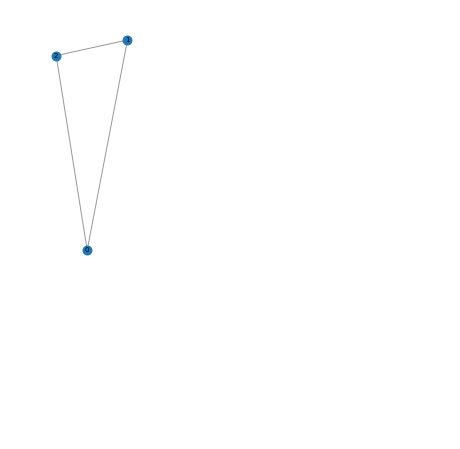

In [86]:
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    cmap=plt.cm.Reds_r,
)
nx.draw_networkx_labels(G,pos,labels,font_size=7)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

In [59]:
show_matrix(A)

,0,1,2
0,0,1,1
1,1,0,1
2,1,1,0


In [60]:
show_matrix(D)

,0,1,2
0,2,0,0
1,0,2,0
2,0,0,2


In [61]:
Lap = D - A
show_matrix(Lap)

,0,1,2
0,2,-1,-1
1,-1,2,-1
2,-1,-1,2


In [ ]:
print ("Eigen values: \n")
print (evals)

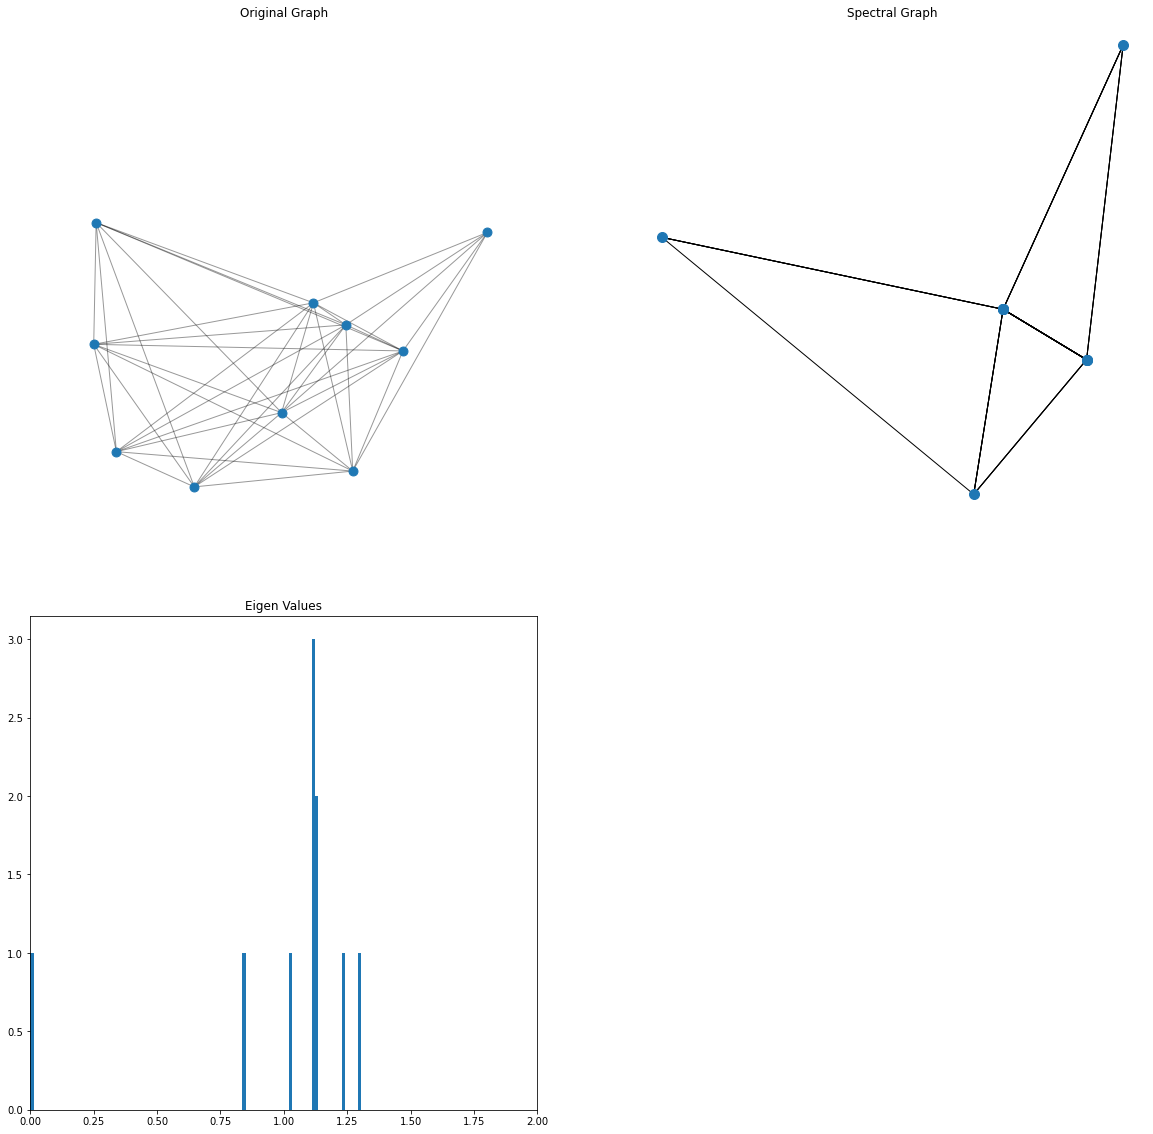

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title("Original Graph")
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    # node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.subplot(222)
plt.title("Spectral Graph")
nx.draw_spectral(G,**options)
plt.subplot(223)
plt.title("Eigen Values")
plt.hist(evals, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()

In [120]:
L_norm = nx.normalized_laplacian_matrix(G)
evals,evecs = calculate_egein(Lap)
second_vector = evecs[0]
print ("evals")
print (evals)
label_vector = np.zeros(len(second_vector))
median = np.median(second_vector)
print ("median: ")
print (median)
label_vector[second_vector>median]=1
label_vector[second_vector<=median]=0
color_map = []
for i in label_vector:
    if i == 0:
        color_map.append('red')
    else:
        color_map.append('green')
print ("label vector")
print (label_vector)

[0.]
[[ 0.57735027 -0.50766227 -0.63948861]]
evals
[0. 3. 3.]
median: 
-0.5076622693934504
label vector
[1. 0. 0.]
